# Fake News Detection

1. A

2. B

3. C

In [192]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import re
import string
from sklearn.metrics import accuracy_score, confusion_matrix

### Load the data

In [193]:
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

## Fake News Database
### First view of the data

In [194]:
df_fake.head()

,title,text,subject,date
0,Cops In Republican Senate Office Violently As...,A group of disabled Americans protesting the S...,News,"June 26, 2017"
1,CNN’s Don Lemon Tries to Downplay Horrific ‘An...,"In case you missed it, CNN anchor Don Lemon we...",US_News,"January 6, 2017"
2,Katrina Pierson Just Blamed Hillary Clinton F...,"Following the presidential debate, Donald Trum...",News,"September 27, 2016"
3,Chris Matthews Stuns Colleagues By Telling Th...,Ted Cruz is horrible. According to former clas...,News,"February 10, 2016"
4,PARKS and REC and JIMMY FALLON Writer Thinks T...,When they go low we go high. Michelle Obam...,left-news,"Oct 1, 2017"


### Number of rows and columns

In [195]:
df_fake.shape

(29759, 4)

### Columns and Types

In [196]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29759 entries, 0 to 29758
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    29759 non-null  object
 1   text     29759 non-null  object
 2   subject  23442 non-null  object
 3   date     23442 non-null  object
dtypes: object(4)
memory usage: 930.1+ KB


## True News Database
### First view of the data

In [197]:
df_true.head()

,title,text,subject,date
0,Energy Secretary Perry cancels Kazakhstan visi...,ALMATY (Reuters) - United States Energy Secret...,politicsNews,"August 28, 2017"
1,"Dozens killed, wounded by car bomb in Afghan p...","KABUL (Reuters) - As many as 13 people, includ...",worldnews,"August 27, 2017"
2,Moscow to cut dependence on U.S. payment syste...,MOSCOW (Reuters) - Russia will speed up work o...,politicsNews,"August 7, 2017"
3,"In Syria, Russia securing position as Assad pr...",BEIRUT (Reuters) - With the map of Syria s con...,worldnews,"December 15, 2017"
4,"Coca, trafficking greatest threats to Colombia...",BOGOTA (Reuters) - A peace deal between Colomb...,worldnews,"October 13, 2017"


### Number of rows and columns

In [198]:
df_true.shape

(27709, 4)

### Columns and Types

In [199]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27709 entries, 0 to 27708
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    27709 non-null  object
 1   text     27709 non-null  object
 2   subject  21381 non-null  object
 3   date     21381 non-null  object
dtypes: object(4)
memory usage: 866.0+ KB


## Adding a new column: giving a class to 'Fake News' and 'True News'

In [200]:
df_fake["class"] = 0
df_true["class"] = 1

In [201]:
df_true.head()

,title,text,subject,date,class
0,Energy Secretary Perry cancels Kazakhstan visi...,ALMATY (Reuters) - United States Energy Secret...,politicsNews,"August 28, 2017",1
1,"Dozens killed, wounded by car bomb in Afghan p...","KABUL (Reuters) - As many as 13 people, includ...",worldnews,"August 27, 2017",1
2,Moscow to cut dependence on U.S. payment syste...,MOSCOW (Reuters) - Russia will speed up work o...,politicsNews,"August 7, 2017",1
3,"In Syria, Russia securing position as Assad pr...",BEIRUT (Reuters) - With the map of Syria s con...,worldnews,"December 15, 2017",1
4,"Coca, trafficking greatest threats to Colombia...",BOGOTA (Reuters) - A peace deal between Colomb...,worldnews,"October 13, 2017",1


In [202]:
df_fake.head()

,title,text,subject,date,class
0,Cops In Republican Senate Office Violently As...,A group of disabled Americans protesting the S...,News,"June 26, 2017",0
1,CNN’s Don Lemon Tries to Downplay Horrific ‘An...,"In case you missed it, CNN anchor Don Lemon we...",US_News,"January 6, 2017",0
2,Katrina Pierson Just Blamed Hillary Clinton F...,"Following the presidential debate, Donald Trum...",News,"September 27, 2016",0
3,Chris Matthews Stuns Colleagues By Telling Th...,Ted Cruz is horrible. According to former clas...,News,"February 10, 2016",0
4,PARKS and REC and JIMMY FALLON Writer Thinks T...,When they go low we go high. Michelle Obam...,left-news,"Oct 1, 2017",0


## Merge the 'Fake News' and 'True News' Database

In [203]:
df_marge = pd.concat([df_fake, df_true], axis=0)
df_marge.head()

,title,text,subject,date,class
0,Cops In Republican Senate Office Violently As...,A group of disabled Americans protesting the S...,News,"June 26, 2017",0
1,CNN’s Don Lemon Tries to Downplay Horrific ‘An...,"In case you missed it, CNN anchor Don Lemon we...",US_News,"January 6, 2017",0
2,Katrina Pierson Just Blamed Hillary Clinton F...,"Following the presidential debate, Donald Trum...",News,"September 27, 2016",0
3,Chris Matthews Stuns Colleagues By Telling Th...,Ted Cruz is horrible. According to former clas...,News,"February 10, 2016",0
4,PARKS and REC and JIMMY FALLON Writer Thinks T...,When they go low we go high. Michelle Obam...,left-news,"Oct 1, 2017",0


### Since we don't need the columns 'title', 'subject', and 'date', we dropped it


In [204]:
df = df_marge.drop(['title', 'subject', 'date'], axis=1)
df.head()

,text,class
0,A group of disabled Americans protesting the S...,0
1,"In case you missed it, CNN anchor Don Lemon we...",0
2,"Following the presidential debate, Donald Trum...",0
3,Ted Cruz is horrible. According to former clas...,0
4,When they go low we go high. Michelle Obam...,0


### The next fuction clean the text from extra space, special caracters, URL, and lowercase


In [205]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

### In order to clean our Database text, we apply the previous fuction to our column 'text'


In [206]:
df["text"] = df["text"].apply(wordopt)
df.head()

,text,class
0,a group of disabled americans protesting the s...,0
1,in case you missed it cnn anchor don lemon we...,0
2,following the presidential debate donald trum...,0
3,ted cruz is horrible according to former clas...,0
4,when they go low we go high michelle obam...,0


### Shuffling

In [207]:
df = df.sample(frac = 1)

### Reset Index: 0, 1, 2...

In [208]:
df.reset_index(inplace = True)

### Deleting Index colum

In [209]:
df.drop(["index"], axis = 1, inplace = True)
df.head()

,text,class
0,the democrats went down the path of identity p...,0
1,katrina pierson is a black woman she is also ...,0
2,johannesburg reuters former zimbabwe finan...,1
3,one of the things that has plagued america b...,0
4,washington reuters the u s department of ...,1


In [210]:
df.shape

(57468, 2)

## Defining the variables for the model

In [211]:
x = df["text"]
y = df["class"]

## Split the data

In [212]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

## Text to Vectors

In [213]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [214]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Confusion Matrix

In [215]:
from sklearn.metrics import plot_confusion_matrix

In [216]:
def conf_mat_acc(model):
    disp = plot_confusion_matrix(model, xv_test, y_test, cmap=plt.cm.Blues, values_format='d')
    true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
    total_data = np.sum(disp.confusion_matrix)
    accuracy = true_pred/total_data
    print('accuracy: ', np.round(accuracy, 2))
    plt.show()

## Logistic Regression

In [217]:
from sklearn.linear_model import LogisticRegression

### Training Logistic regretion model

In [218]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [219]:
pred_LR = LR.predict(xv_test)
print(pred_LR)

[1 1 0 ... 1 0 0]


In [220]:
LR.score(xv_test, y_test)

0.9623281712197669

In [221]:
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5975
           1       0.97      0.96      0.96      5519

    accuracy                           0.96     11494
   macro avg       0.96      0.96      0.96     11494
weighted avg       0.96      0.96      0.96     11494



accuracy:  0.96


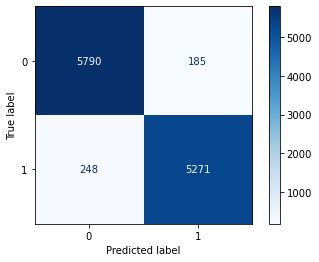

In [222]:
conf_mat_acc(LR)

The Accuracy is as follow (17508+15865)/(17508+15865+152+148)=0.99

17508: in the database the value was 0 but the prediction was 0, so it is correct!

15865: in the database the value was 1 but the prediction was 1, so it is correct! 

152: in the database the value was 0 but the prediction was 1, so it is incorrect

148: in the database the value was 1 but the prediction was 0, so it is incorrect

*The best model would be 0 in the errors (152 & 148) and whole the values in the diagonal*

## Decision Tree Classification

In [223]:
from sklearn.tree import DecisionTreeClassifier

### Training the Decision Tree

In [224]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [225]:
pred_DT = DT.predict(xv_test)

In [226]:
DT.score(xv_test, y_test)

0.9757264659822517

In [227]:
print(classification_report(y_test, pred_DT))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5975
           1       0.97      0.98      0.97      5519

    accuracy                           0.98     11494
   macro avg       0.98      0.98      0.98     11494
weighted avg       0.98      0.98      0.98     11494



accuracy:  0.98


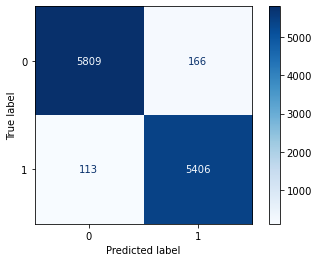

In [228]:
conf_mat_acc(DT)

## Gradient Boosting Classifier

In [229]:
from sklearn.ensemble import GradientBoostingClassifier

In [230]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [231]:
pred_gbc = GBC.predict(xv_test)

In [232]:
GBC.score(xv_test, y_test)

0.9524099530189665

In [233]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      5975
           1       0.97      0.92      0.95      5519

    accuracy                           0.95     11494
   macro avg       0.95      0.95      0.95     11494
weighted avg       0.95      0.95      0.95     11494



accuracy:  0.95


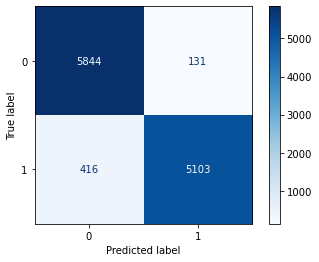

In [234]:
conf_mat_acc(GBC)

## Random Forest Classifier

In [235]:
from sklearn.ensemble import RandomForestClassifier

In [236]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [237]:
RFC.score(xv_test, y_test)

0.9829476248477467

In [238]:
pred_RFC = RFC.predict(xv_test)

In [239]:
score = accuracy_score(y_test, pred_RFC)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 98.29%


In [240]:
print(classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5975
           1       0.98      0.98      0.98      5519

    accuracy                           0.98     11494
   macro avg       0.98      0.98      0.98     11494
weighted avg       0.98      0.98      0.98     11494



accuracy:  0.98


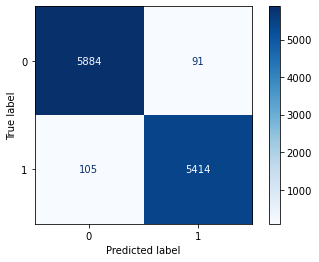

In [241]:
conf_mat_acc(RFC)

## Passive Aggressive Classifier

In [242]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [243]:
PAC=PassiveAggressiveClassifier(max_iter=50)
PAC.fit(xv_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [244]:
pred_PAC=PAC.predict(xv_test)
score = accuracy_score(y_test, pred_PAC)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 98.66%


In [245]:
PAC.score(xv_test, y_test)

0.9866017052375152

accuracy:  0.99


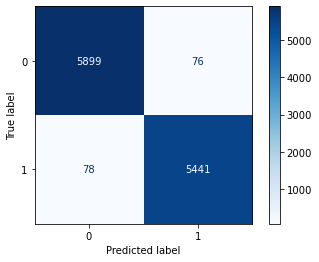

In [246]:
conf_mat_acc(PAC)

# Final Test

In [247]:
news = pd.read_csv('News.csv')
news

,title,text,class,subject,date
0,‘We Caved’,"On a late July day this past summer, a roar fi...",1,NaN,NaN
1,Zimbabwe court postpones U.S. citizen's subver...,HARARE (Reuters) - A Zimbabwean court has post...,1,worldnews,"December 8, 2017"
2,Congress sends White House repeal of broadband...,WASHINGTON (Reuters) - The U.S. House voted on...,1,politicsNews,"March 28, 2017"
3,Poland's stance on migrants unchanged despite ...,"KRYNICA ZDROJ, Poland (Reuters) - Poland will ...",1,worldnews,"September 6, 2017"
4,Putin critic Navalny calls election boycott ra...,MOSCOW (Reuters) - Opposition leader Alexei Na...,1,worldnews,"December 27, 2017"
...,...,...,...,...,...
95,Finnish president says joining NATO would requ...,HELSINKI (Reuters) - Any move by Finland to jo...,1,worldnews,"October 30, 2017"
96,Head of UK's anti-Brexit party appeals for hel...,LONDON (Reuters) - Calling himself a proud sa...,1,worldnews,"September 18, 2017"
97,Hezbollah emerges a winner from Mideast turmoi...,BEIRUT (Reuters) - When Iran declared victory ...,1,worldnews,"November 30, 2017"
98,Say What?! FBI Never Destroyed Laptops of Clin...,0 comments \nThis is just too rich! The FBI ag...,0,NaN,NaN


In [248]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    100 non-null    object
 1   text     100 non-null    object
 2   class    100 non-null    int64 
 3   subject  75 non-null     object
 4   date     75 non-null     object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


In [249]:
news['class'].unique()

array([1, 0])

In [250]:
news["text"] = news["text"].apply(wordopt) 
final_x_test = news["text"]
final_xv_test = vectorization.transform(final_x_test)

In [251]:
final_y_test = news['class']

## Logistic Regression TEST

In [252]:
LR.score(final_xv_test, final_y_test)

0.97

## Decision Tree TEST

In [253]:
DT.score(final_xv_test, final_y_test)

0.99

## Gradient Boosting Classifier TEST

In [254]:
GBC.score(final_xv_test, final_y_test)

0.99

## Random Forest Classifier

In [255]:
RFC.score(final_xv_test, final_y_test)

0.99